Binary Classification 3

1. Binary classification with multiple predictors
2. Support vector machines

As always let's import our libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import tree

And just like last class, let's focus on the  MPG dataset and see if we can predict whether a car has an origin from the USA or Not USA using mpg as the predictor

In [2]:
mpg = sns.load_dataset('mpg')

In [3]:
dummy_origin =  pd.get_dummies(mpg['origin'])
mpg.insert(len(mpg.columns),'usa',dummy_origin['usa'])

In [4]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,usa
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,1
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,1
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,1
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,1
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,1


As we saw yesterday, mpg by itself seems like a better good predictor for whether the car is USA or not usa

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='usa', ylabel='mpg'>

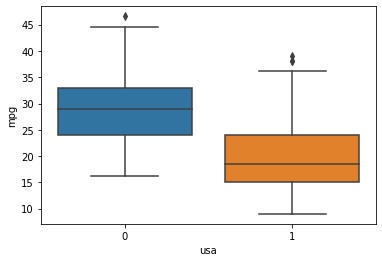

In [5]:
sns.boxplot(mpg['usa'],mpg['mpg'])

In [6]:
Xtrain,Xtest,ytrain,ytest = train_test_split(mpg[['mpg']],mpg['usa'],random_state=1)

In [7]:
logit_model = LogisticRegression(random_state =1)
logit_model = logit_model.fit(Xtrain, ytrain)
print(logit_model.score(Xtrain,ytrain))
print(logit_model.score(Xtest,ytest))

0.7315436241610739
0.8


In [8]:
tree_model = tree.DecisionTreeClassifier(max_depth=1)
tree_model = tree_model.fit(Xtrain, ytrain)
print(tree_model.score(Xtrain,ytrain))
print(tree_model.score(Xtest,ytest))

0.7651006711409396
0.77


With a single predictor, we do a pretty decent job. >75% is pretty good!

But we aren't always dealing with one predictor and we can probably do even better with multiple predictors!

In [9]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,usa
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,1
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,1
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,1
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,1
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,1


Let's look at the scatterplot of total_phenols and proline

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='displacement', ylabel='mpg'>

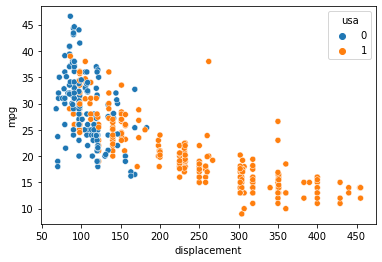

In [10]:
sns.scatterplot(mpg['displacement'],mpg['mpg'],hue=mpg['usa'])

Using both predictors, we can probably do an even better job of separating groups 0 and 1!

In [11]:
X = mpg[['displacement','mpg']]

In [12]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,mpg['usa'],random_state=1)

And now let's this new data with a logistic regression

In [13]:
logit_model2 = LogisticRegression()
logit_model2 = logit_model.fit(Xtrain, ytrain)

And let's see the score of the train and test

In [14]:
print(logit_model.score(Xtrain,ytrain))
print(logit_model.score(Xtest,ytest))

0.8557046979865772
0.88



Just like with linear regression, its hard to see what this fit looks like in logistic regression when there are multiple predictors

Let's take a peek with a tree diagram

In [15]:
tree_model2 = tree.DecisionTreeClassifier(max_depth=1)
tree_model2.fit(Xtrain, ytrain)
print(tree_model2.score(Xtrain,ytrain))
print(tree_model2.score(Xtest,ytest))

0.8590604026845637
0.9


Try playing around with the max_depth and you will see at what level the decision tree uses both dfeatures.

In [16]:
tree_model3 = tree.DecisionTreeClassifier(max_depth=3) 
tree_model3.fit(Xtrain, ytrain)
print(tree_model3.score(Xtrain,ytrain))
print(tree_model3.score(Xtest,ytest))

0.9093959731543624
0.84


[Text(386.3076923076923, 570.7800000000001, 'X[0] <= 134.5\ngini = 0.469\nsamples = 298\nvalue = [112, 186]'),
 Text(206.03076923076924, 407.70000000000005, 'X[0] <= 97.5\ngini = 0.355\nsamples = 130\nvalue = [100, 30]'),
 Text(103.01538461538462, 244.62, 'X[1] <= 29.25\ngini = 0.1\nsamples = 57\nvalue = [54, 3]'),
 Text(51.50769230769231, 81.53999999999996, 'gini = 0.198\nsamples = 18\nvalue = [16, 2]'),
 Text(154.52307692307693, 81.53999999999996, 'gini = 0.05\nsamples = 39\nvalue = [38, 1]'),
 Text(309.04615384615386, 244.62, 'X[0] <= 106.0\ngini = 0.466\nsamples = 73\nvalue = [46, 27]'),
 Text(257.53846153846155, 81.53999999999996, 'gini = 0.397\nsamples = 22\nvalue = [6, 16]'),
 Text(360.55384615384617, 81.53999999999996, 'gini = 0.338\nsamples = 51\nvalue = [40, 11]'),
 Text(566.5846153846154, 407.70000000000005, 'X[0] <= 190.5\ngini = 0.133\nsamples = 168\nvalue = [12, 156]'),
 Text(515.0769230769231, 244.62, 'X[0] <= 159.5\ngini = 0.426\nsamples = 39\nvalue = [12, 27]'),
 Text(

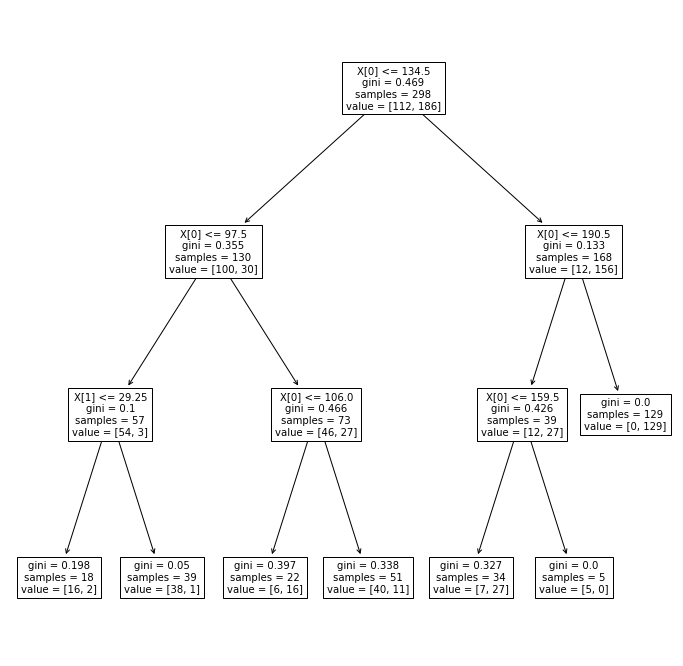

In [17]:
plt.figure(figsize=[12,12])
tree.plot_tree(tree_model3)

With max_depth 1 or 2, it only considered X[1] (i.e., the second column of data) and basically splits with just that column. Accuracy doesn't change much either

With a max_depth of 3, you can see it using X[0] in some of the branches. And our accuracy is better! Nice!

But there is another really useful method for binary classification

Support vector classification 

https://en.wikipedia.org/wiki/Support_vector_machine#Linear_SVM

And let's import the library

In [18]:
from sklearn.svm import SVC

Here, we will create an instance of the model with a linear kernal, meaning it will separate the data using just a line

In [19]:
svc_model = SVC(kernel='linear')
svc_model.fit(Xtrain, ytrain)

SVC(kernel='linear')

Let's check the accuracy of this SVC model.

In [20]:
print(svc_model.score(Xtrain,ytrain))
print(svc_model.score(Xtest,ytest))

0.8523489932885906
0.88


Pretty good!

We can check the predictions. Again, it returns a 1 or 0 on whether it thinks the data will belong to group 1 or 0

In [21]:
svc_model.predict(Xtrain)

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1], dtype=u

We can view our support vectors, which are the datapoints on the margin

In [22]:
svc_model.support_vectors_

array([[121. ,  24. ],
       [145. ,  30.7],
       [119. ,  37. ],
       [114. ,  20. ],
       [108. ,  34. ],
       [134. ,  24. ],
       [121. ,  19. ],
       [107. ,  32.4],
       [119. ,  27.2],
       [121. ,  25. ],
       [107. ,  36. ],
       [113. ,  24. ],
       [156. ,  20. ],
       [163. ,  16.2],
       [108. ,  26. ],
       [130. ,  20. ],
       [134. ,  29.8],
       [ 91. ,  44.6],
       [ 90. ,  43.1],
       [134. ,  21.1],
       [146. ,  30. ],
       [113. ,  25. ],
       [119. ,  23.9],
       [108. ,  32.2],
       [ 97. ,  44. ],
       [144. ,  32. ],
       [ 86. ,  46.6],
       [120. ,  36. ],
       [115. ,  23. ],
       [107. ,  24. ],
       [163. ,  17. ],
       [168. ,  25.4],
       [116. ,  24. ],
       [107. ,  28. ],
       [ 90. ,  43.4],
       [116. ,  26. ],
       [ 90. ,  44.3],
       [156. ,  19. ],
       [113. ,  24. ],
       [120. ,  31.6],
       [110. ,  25. ],
       [121. ,  22. ],
       [120. ,  24. ],
       [116

And plot them onto our data. This gives us a quick look into how ou data was separate

In [23]:
Xtrain

,displacement,mpg
192,250.0,22.0
27,318.0,11.0
89,318.0,15.0
310,89.0,38.1
73,307.0,13.0
...,...,...
393,140.0,27.0
255,140.0,25.1
72,304.0,15.0
235,97.0,26.0


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='displacement', ylabel='mpg'>

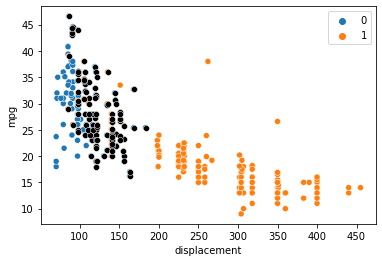

In [24]:
sns.scatterplot(Xtrain['displacement'], Xtrain['mpg'], hue=ytrain)
sns.scatterplot(svc_model.support_vectors_[:,0],svc_model.support_vectors_[:,1],color='k')

Alterantively, we can plot our margin using the coef_ and intercept_ of the model.

Note: this is specific to linear SVC

In [25]:
svc_model.coef_

array([[0.03930158, 0.03649028]])

In [26]:
svc_model.intercept_

array([-6.07851401])

To use the coef_ and intercept, we need to do a few things. First, let's pull out the coefficents, which are basically weights

In [27]:
w = svc_model.coef_[0]
print(w)

[0.03930158 0.03649028]


Dividing them basically gets us a slope

In [28]:
slope = -w[0] / w[1] 
print(slope)

-1.0770423030664809


Our intercept needs to be adjusted by the weight of the y-axis

In [29]:
intercept = -svc_model.intercept_[0]/w[1]
print(intercept)

166.5789750943223


Then, using Xtrain as the X in our y = m*x + b equation, we can derive our line

In [30]:
yy = slope * Xtrain['displacement'] + intercept

Let's put this all on the plot

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 50.0)

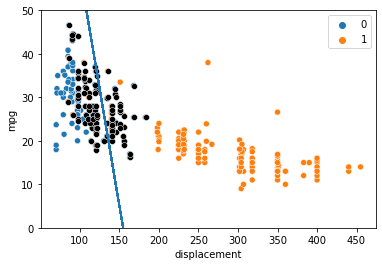

In [31]:
sns.scatterplot(Xtrain['displacement'], Xtrain['mpg'], hue=ytrain)
plt.plot(Xtrain['displacement'], yy)
sns.scatterplot(svc_model.support_vectors_[:,0],svc_model.support_vectors_[:,1],color='k')
plt.ylim([0,50])

Looks good!

We can do this with the testing data too to get a feel for how well it separated it

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 50.0)

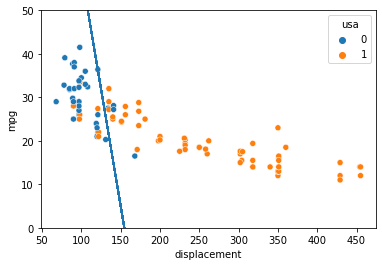

In [32]:
yy = slope * Xtest['displacement'] + intercept

sns.scatterplot(Xtest['displacement'], Xtest['mpg'], hue=ytest)
plt.plot(Xtest['displacement'], yy)
plt.ylim([0,50])

Here is another method to generate the margin. Its a bit more complex

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


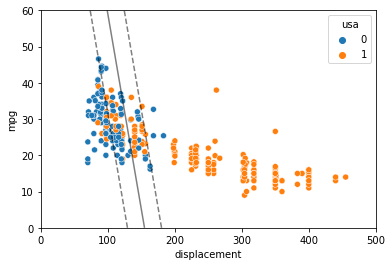

In [33]:
sns.scatterplot(Xtrain['displacement'], Xtrain['mpg'],hue=ytrain)

# create grid to evaluate model
xx = np.linspace(0, 500, 30)  # works best if you know the xlim[0] and xlim[1]
yy = np.linspace(0,60, 30)  # works best if you know the ylim[0] and ylim[1]
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc_model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

That's pretty much most of what I wanted to cover of binary classification

There are other types of classification techniques (Random forest, perceptron, k-nearest neighbors) and we could certainly spend a lot more time talking about the naunces of Decision Trees and Support Vector machines.

For now, I think this should give you a basic idea of how to conduct classification, what is happening, and how to evaluate the classification

Next, we will cover what cross-validation is because it concerns how we conduct our machine learning